## MNIST Dataset 분류기 with ConvNet

* 한림대학교 딥러닝이해및활용 (710231)에 사용된 코드입니다. 

### 설정하기

In [16]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

데이터 받아오기

In [17]:
mnist = input_data.read_data_sets('./MNIST_data/', one_hot=True)

Extracting ./MNIST_data/train-images-idx3-ubyte.gz
Extracting ./MNIST_data/train-labels-idx1-ubyte.gz
Extracting ./MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./MNIST_data/t10k-labels-idx1-ubyte.gz


Hyper parameters

In [18]:
learning_rate = 0.001
batch_size = 50
training_epochs = 1000#10000 # 20000번 정도 #전체 데이터 학습 횟수

### 필요 함수 정의

 초기화

In [19]:
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

Convolution and Pooling

In [20]:
def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

In [21]:
X = tf.placeholder(tf.float32, shape=[None, 784]) #28x28
Y = tf.placeholder(tf.float32, shape=[None, 10]) 

In [22]:
# reshape x to a 4d tensor < -  784를 -1 28 28 1로 바꾼다!
x_image = tf.reshape(X, [-1,28,28,1]) #784를 변형 -1은 none에 맞게 알아서 계산하란 명령

### Classifier Setup

First Convolutional Layer
*  The convolution will compute 32 features for each 5x5 patch.

In [23]:
W_conv1 = weight_variable([5, 5, 1, 32]) #필터의 크기 정함, 채널1(흑백이미지), 32는 필터가 32장 -> 32개니까 뚱뚱해짐
b_conv1 = bias_variable([32])

# We then convolve x_image with the weight tensor, add the bias, apply the ReLU function, and finally max pool.
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)

# The max_pool_2x2 method will reduce the image size to 14x14.
h_pool1 = max_pool_2x2(h_conv1)

Second Conv Layer
* The second layer will have 64 features for each 5x5 patch.

In [24]:
W_conv2 = weight_variable([5, 5, 32, 64]) #아까는 1이었지만, 전단계에서 32개의 필터를 썼기때문에 1대신 32가 들어감
b_conv2 = bias_variable([64])
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2) ## the image size will be reduced to 7x7

Densely Connected Layer (Fully connected layer)

In [25]:
n_neurons = 1024

본 예제에서는 이미지의  크기가  Convolution layer들을 거쳐오며 7x7로 줄어 들었음. 이때 이미지의 채널은 64개. 이걸 1024 개의 1차원 neuron에 연결할수 있도록 reshape 함.
reshape은다음과 같이 호출
```
tf.reshape(h_pool2, [-1, 7*7*64])
```

In [26]:
W_fc1 = weight_variable([7 * 7 * 64, n_neurons])
b_fc1 = bias_variable([n_neurons])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

마지막 Readout Layer : 최종 10개로 연결 !

In [27]:
W_fc2 = weight_variable([n_neurons, 10])
b_fc2 = bias_variable([10])

y_conv = tf.matmul(h_fc1, W_fc2) + b_fc2

### Train and Evaluate the Model

In [28]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y, logits=y_conv))
cost = cross_entropy
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost) #train_step
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(Y,1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

sess = tf.Session()
sess.run(tf.global_variables_initializer())

Cost 를 기록하기 위한 empty list

In [29]:
vcost=[]

In [30]:
for i in range(training_epochs):
    batch = mnist.train.next_batch(batch_size)
    if i%100 == 0:
        train_accuracy = sess.run(accuracy, feed_dict={X:batch[0], Y: batch[1]})
        print("Epoch {}, training accuracy {}".format(i, train_accuracy))

    c, _ = sess.run([cost, optimizer], feed_dict={X: batch[0], Y: batch[1]})
    vcost.append(c)

Epoch 0, training accuracy 0.10000000149011612
Epoch 100, training accuracy 0.9599999785423279
Epoch 200, training accuracy 0.9599999785423279
Epoch 300, training accuracy 1.0
Epoch 400, training accuracy 0.9800000190734863
Epoch 500, training accuracy 0.9800000190734863
Epoch 600, training accuracy 0.9399999976158142
Epoch 700, training accuracy 1.0
Epoch 800, training accuracy 1.0
Epoch 900, training accuracy 0.9599999785423279


In [31]:
print(mnist.train.images.shape)
print(mnist.train.labels.shape)


(55000, 784)
(55000, 10)


In [32]:
acc1 = sess.run(accuracy, feed_dict={X: mnist.train.images[:1000], Y: mnist.train.labels[:1000]})
print("Train accuracy :{}".format(acc1))

Train accuracy :0.9769999980926514


In [33]:
acc1 = sess.run(accuracy, feed_dict={X: mnist.test.images[:1000], Y: mnist.test.labels[:1000]})
print("Test accuracy :{}".format(acc1))

Test accuracy :0.9769999980926514


Cost graph

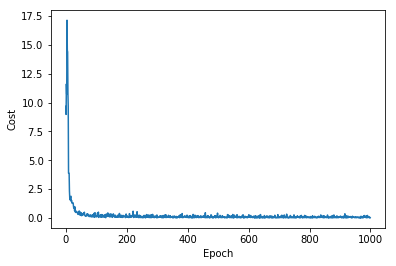

In [34]:
plt.plot(vcost)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()

In [35]:
sess.close()